In [ ]:
import numpy as np
import pandas as pd
from scipy.integrate import quad
from numpy.linalg import solve
import matplotlib.pyplot as plt
from math import cos, sin

Определю данные и задам центрально равномерные сетки

In [ ]:
N = 8
n = 62
a = -1
b = 1
ysel = 40
alpha = -2
betta = 2

In [ ]:
A = np.linspace(a, b, ysel + 1)  # tay

tau = A

h = (b - a) / ysel

print('Равномерная сетка A:\n', tau)
print('Шаг сетки h:\n', h)

Равномерная сетка A:
 [-1.   -0.95 -0.9  -0.85 -0.8  -0.75 -0.7  -0.65 -0.6  -0.55 -0.5  -0.45
 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05  0.1   0.15
  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65  0.7   0.75
  0.8   0.85  0.9   0.95  1.  ]
Шаг сетки h:
 0.05


In [ ]:
k=ysel
F=[]
for i in range(k):
  buf=[]
  for j in range(k):
    buf.append(0)
  F.append(buf)


F[0][0]=1
print(F[0])
for i in range(1, k-2):
  F[i][i-1]=1/(h*h)-A[i]/(2*h)
  F[i][i]=-2/(h*h)-4
  F[i][i+1]=1/(h*h)+A[i]/(2*h)
  print(F[i])
F[k-1][k-1]=1
print(F[k-1])

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[409.49999999999994, -803.9999999999999, 390.49999999999994, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 408.99999999999994, -803.9999999999999, 390.99999999999994, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 408.49999999999994, -803.9999999999999, 391.49999999999994, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 407.99999999999994, -803.9999999999999, 391.99999999999994, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 407.49999999999994, -803.9999999999999, 392.49999999999994, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 406

In [ ]:
v=[]
v.append(-2)
print(v[0])
for i in range (1, ysel):
  v.append((-A[i]*A[i]*A[i]+12*A[i]*A[i]+6*A[i]-4)*alpha+(-2*A[i]*A[i]-3*A[i]+2)*betta)
  print(v[i])
v[ysel-1]=-2
print(v[ysel-1])

-2
2.115250000000003
4.061999999999998
5.84175
7.455999999999998
8.90625
10.193999999999999
11.32075
12.288
13.097249999999999
13.75
14.24775
14.592
14.78425
14.825999999999999
14.71875
14.463999999999999
14.06325
13.518
12.82975
12.0
11.030249999999999
9.921999999999997
8.676749999999997
7.295999999999995
5.78125
4.133999999999999
2.355749999999997
0.4479999999999946
-1.5877500000000069
-3.75
-6.037250000000003
-8.448000000000004
-10.980750000000006
-13.63400000000001
-16.40625
-19.296000000000006
-22.301750000000006
-25.422000000000004
-28.65525000000001
-2


In [ ]:
L=[]
M=[]
b=1
c=0
f=v[0]
L.append(-c/b)
M.append(f/b)
print('L',L)
print('M',M)

for i in range(1, k):
  a=1/(h*h)-A[i]/(2*h)
  b=-2/(h*h)-4
  c=1/(h*h)+A[i]/(2*h)
  f=v[i]
  L.append(-c/(L[i-1]*a+b))
  M.append((f-M[i-1]*a)/(L[i-1]*a+b))
  print('L (',i,')',L)
  print('M (',i,')',M)
M.append((v[k-1]-M[k-2]*0)/(L[k-2]*0+1))
print('L',L)
print('M',M)
x_k=M[k-1]

L [0.0]
M [-2.0]
L ( 1 ) [0.0, 0.48569651741293535]
M ( 1 ) [-2.0, -1.0212876243781095]
L ( 2 ) [0.0, 0.48569651741293535, 0.6459071936289491]
M ( 2 ) [-2.0, -1.0212876243781095, -0.6967350321500961]
L ( 3 ) [0.0, 0.48569651741293535, 0.6459071936289491, 0.7248028114858792]
M ( 3 ) [-2.0, -1.0212876243781095, -0.6967350321500961, -0.5377389086222775]
L ( 4 ) [0.0, 0.48569651741293535, 0.6459071936289491, 0.7248028114858792, 0.7712277695371254]
M ( 4 ) [-2.0, -1.0212876243781095, -0.6967350321500961, -0.5377389086222775, -0.4463155594857764]
L ( 5 ) [0.0, 0.48569651741293535, 0.6459071936289491, 0.7248028114858792, 0.7712277695371254, 0.8014707301730168]
M ( 5 ) [-2.0, -1.0212876243781095, -0.6967350321500961, -0.5377389086222775, -0.4463155594857764, -0.389565498242486]
L ( 6 ) [0.0, 0.48569651741293535, 0.6459071936289491, 0.7248028114858792, 0.7712277695371254, 0.8014707301730168, 0.8225174506723295]
M ( 6 ) [-2.0, -1.0212876243781095, -0.6967350321500961, -0.5377389086222775, -0.446

In [ ]:
x=[]
x.append(x_k)
for i in range (1,k+1):
  x.append(L[k-i]*x[i-1]+M[k-i])

x.reverse()
print(x)

[-2.0, -2.003218138260671, -2.021695603486759, -2.0513172548714573, -2.0882622449356596, -2.1290035840324384, -2.170307685989297, -2.209233895252398, -2.243133996005791, -2.2696517038481785, -2.2867221407188523, -2.292571293872012, -2.285715459803596, -2.2649606741358537, -2.229402128561098, -2.1784235760362063, -2.1116967255025605, -2.029180627481165, -1.9311210519587918, -1.8180498600373973, -1.6907843708650097, -1.5504267254012722, -1.3983632485943858, -1.236263811558051, -1.0660811953370122, -0.8900504578379438, -0.7106883054788684, -0.5307924710753015, -0.35344109943536817, -0.18199214207974407, -0.020082762436158544, 0.1283712472168579, 0.2591760358653965, 0.36786024983334187, 0.44967557380805245, 0.49959725591442455, 0.5123246160381271, 0.4822815367063719, 0.4036169359436873, 0.2702052216296655, 0.14073891258666943]


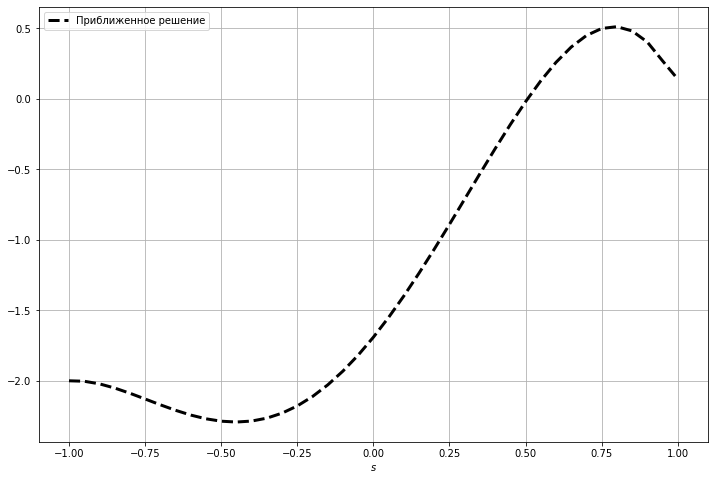

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(A, x, color = "black", linestyle='--', linewidth=3, label="Приближенное решение")
#plt.plot(A, resh, color = "black",label="Аналитическое решение")

plt.xlabel(r'$s$')
plt.grid()
plt.legend()
plt.show()